In [1]:
import pandas as pd

# Würfelexperiment

Aus der Stochastik wissen wir, dass der *Erwartungswert* für das Ergebnis des Würfelns mit einem 6-seitigen Würfels

In [2]:
expected_value_dice = 1 * 1/6.0 + 2 * 1/6.0 + 3 * 1/6.0 + 4 * 1/6.0 + 5 * 1/6.0 + 6 * 1/6.0
print(expected_value_dice)

3.5


ist. Das heißt das mathematische Model sagt uns, wenn wir ein Würfelexperiment lange genug durchführen müsste im Mittel die Zahl 3.5 als Ergebnis rauskommen.

**In der Praxis fangen wir normalerweise nicht mit dem mathematischen Modell an, sondern mit irgendwelchen Daten!**

Wenn wir die Daten analysieren schauen wir uns evtl. den **empirischen Erwartungswert** an. Der empirische Erwartungswert soll uns als Schätzer für den mathematischen Erwartungswert dienen.

---

Für diese Experiment generieren wir uns mittels des *random* moduls von numpy die Ergebnisse aus dem Experiment

In [3]:
import numpy as np
import scipy, scipy.stats
import matplotlib.pyplot as plt

In [4]:
n = 10
spiele_ergebnis = np.random.randint(1,7,n) # Zahlen 1-6 (Die obere Grenze ist nicht eingeschlossen!!)

Wir berechnen den empirischen Mittelwert:

In [5]:
empirischer_erwartungswert = spiele_ergebnis.sum()/float(n)

**Aufgabe: Ergänze den Code um die Berechnung der empirischen Varianz **

Nun berechnen wir den Fehler zwischen dem rechnerischen und dem empirischen Erwartungswert:

In [6]:
print ("Rechnerischer Erwartungswert: ", 3.5)
print ("Emiprischer Erwartungswert: ", empirischer_erwartungswert)
print ("Fehler: ", np.abs(empirischer_erwartungswert - 3.5))

Rechnerischer Erwartungswert:  3.5
Emiprischer Erwartungswert:  3.4
Fehler:  0.10000000000000009


**Wie wir wissen ist der rechnerische Erwartungswert der zugrunde liegenden diskreten Gleichverteilung ist 3.5. Wird der Schätzer genauer, wenn ich mehr Ziehungen habe?**

Da sowohl die Summe der Ergebnisse und die Zahl n ganzzahlig ist wird Ergebnis automatisch auf eine ganze Zahl gerundet. Mit `float(n)` n zu einer Fließkommazahl, so dass das Ergebnis als Fließkommazahl ausgegeben wird.

---

### Viele Stichproben und der Erwartungswert

Bei kleinem n (z. B. n=10) ist das Ergebnis nicht sonderlich stabil, d. h. bei wiederholten Ausführung des Würfelexperiments (mit gleicher Anzahl n) variert das Ergebnis stark. Mit größerem n ist dies nicht mehr so deutlich, deshalb sagt man, dass das Ergebnis stabiler ist. 

In [7]:
n = 10
spiele_ergebnis = np.random.randint(1,7,n) # Zahlen 1-6 (Die obere Grenze ist nicht eingeschlossen!!)
ergebnisse = pd.DataFrame(spiele_ergebnis).T
ergebnisse

,0,1,2,3,4,5,6,7,8,9
0,1,3,4,3,1,5,4,1,2,5


In [11]:
# Wir spielen das gleiche Spiel mehrfach
for i in range(0,20000):
    ergebnisse = ergebnisse.append(pd.DataFrame(np.random.randint(1,7,n)).T)

In [12]:
erwartungswerte = ergebnisse.mean(axis=1)

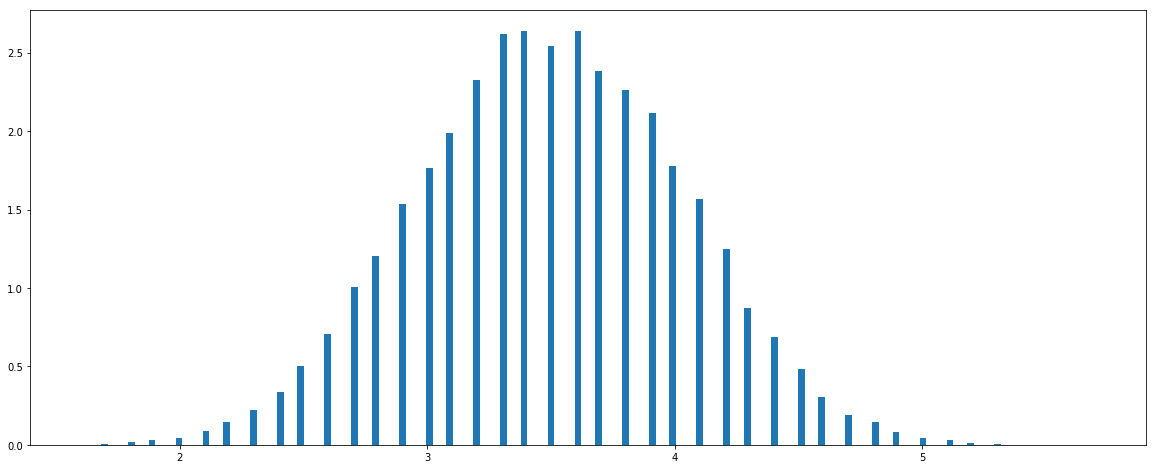

In [13]:
plt.figure(1, figsize=(20, 8))
plt.hist(erwartungswerte, 150,density=True);